<a href="https://colab.research.google.com/github/cecellhax/webapp_regioes/blob/main/regioes_brasileira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados da população Brasileira e sua distribuição geografica**

Dados da densidade populacional do Brasil.


**Fonte:** https://pt.wikipedia.org/

**Dados disponíveis em:** https://pt.wikipedia.org/wiki/Lista_de_estados_brasileiros_por_n%C3%BAmero_de_munic%C3%ADpios

In [1]:
import pandas as pd

In [3]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_estados_brasileiros_por_n%C3%BAmero_de_munic%C3%ADpios'

In [4]:
lista_df = pd.read_html(url)

In [5]:
lista_df

[  Número total de municípios Número total de municípios.1
 0                     Brasil                        5 568,
          Região  Unidadesfederativas Municípios Porcentagem
 0      Nordeste                    9      1 793      32,21%
 1       Sudeste                    4      1 668      29,95%
 2           Sul                    3      1 191      21,39%
 3  Centro-Oeste                    4        466       8,37%
 4         Norte                    7        450       8,08%,
     Posição  ... Média de habitantespor município
 0         1  ...                        24 606,40
 1         2  ...                        69 370,85
 2         3  ...                        22 717,85
 3         4  ...                        36 621,28
 4         5  ...                        28 174,60
 5         6  ...                        23 331,50
 6         7  ...                        27 195,83
 7         8  ...                        14 340,96
 8         9  ...                        17 917,22
 9  

### **Seleção dos dataframes da lista que seram utilizados nesta análise.**

In [6]:
#Quantidade de habitantes por região
qhr = lista_df[1]
qhr.head()

,Região,Unidadesfederativas,Municípios,Porcentagem
0,Nordeste,9,1 793,"32,21%"
1,Sudeste,4,1 668,"29,95%"
2,Sul,3,1 191,"21,39%"
3,Centro-Oeste,4,466,"8,37%"
4,Norte,7,450,"8,08%"


In [7]:
qhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Região               5 non-null      object
 1   Unidadesfederativas  5 non-null      int64 
 2   Municípios           5 non-null      object
 3   Porcentagem          5 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [8]:
qhr.describe()

,Unidadesfederativas
count,5.00000
mean,5.40000
std,2.50998
min,3.00000
25%,4.00000
50%,4.00000
75%,7.00000
max,9.00000


**Obs.:** Pudemos observar que algumas colunas estaõ com a tipagem incorreta, por exemplo a coluna 'Municípios' que deveria ser de um tipo numérico mas esta indicada com o tipo 'object'. Desta forma, corrigiramos isso a segir.

In [9]:
!pip install unidecode

     |████████████████████████████████| 245kB 5.2MB/s 


In [10]:
from unidecode import unidecode

In [11]:
qhr['Municípios'] = qhr['Municípios'].apply(lambda x: (unidecode(x).replace(' ',''))).astype(int)

In [13]:
qhr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Região               5 non-null      object
 1   Unidadesfederativas  5 non-null      int64 
 2   Municípios           5 non-null      int64 
 3   Porcentagem          5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [14]:
qhr.describe()

,Unidadesfederativas,Municípios
count,5.00000,5.000000
mean,5.40000,1113.600000
std,2.50998,639.274041
min,3.00000,450.000000
25%,4.00000,466.000000
50%,4.00000,1191.000000
75%,7.00000,1668.000000
max,9.00000,1793.000000


In [15]:
#Quantidade de municípios por estado
qme = lista_df[2]
qme.head()

,Posição,Estado,Região,Número demunicípios[8],Número de habitantespor estado federado[9],Média de habitantespor município
0,1,Minas Gerais,Sudeste,853,20 989 259,"24 606,40"
1,2,São Paulo,Sudeste,645,44 744 199,"69 370,85"
2,3,Rio Grande do Sul,Sul,497,11 290 773,"22 717,85"
3,4,Bahia,Nordeste,417,15 271 073,"36 621,28"
4,5,Paraná,Sul,399,11 241 665,"28 174,60"


In [18]:
#Alterando o nome de algumas colunas para melhor entendimento
dic_alteracao = {'Número demunicípios[8]': 'Número de municípios', 'Média de habitantespor município': 'Média por município', 'Número de habitantespor estado federado[9]': 'Habitantes por estado'}
qme.rename(columns = dic_alteracao, inplace=True)

In [20]:
qme.head()

,Posição,Estado,Região,Número de municípios,Habitantes por estado,Média por município
0,1,Minas Gerais,Sudeste,853,20 989 259,"24 606,40"
1,2,São Paulo,Sudeste,645,44 744 199,"69 370,85"
2,3,Rio Grande do Sul,Sul,497,11 290 773,"22 717,85"
3,4,Bahia,Nordeste,417,15 271 073,"36 621,28"
4,5,Paraná,Sul,399,11 241 665,"28 174,60"


In [22]:
qme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Posição                26 non-null     int64 
 1   Estado                 26 non-null     object
 2   Região                 26 non-null     object
 3   Número de municípios   26 non-null     int64 
 4   Habitantes por estado  26 non-null     object
 5   Média por município    26 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


In [23]:
qme.describe()

,Posição,Número de municípios
count,26.000000,26.000000
mean,13.500000,214.153846
std,7.648529,202.556598
min,1.000000,15.000000
25%,7.250000,78.250000
50%,13.500000,155.500000
75%,19.750000,240.500000
max,26.000000,853.000000


**Corrigindo também os tipos do segundo dataframe.**

In [24]:
qme['Habitantes por estado'] = qme['Habitantes por estado'].apply(lambda x: (unidecode(x).replace(' ',''))).astype(int)

In [26]:
qme['Média por município']=qme['Habitantes por estado']/qme['Número de municípios']

In [27]:
qme['Média por município']

0      24606.399766
1      69370.851163
2      22717.853119
3      36621.278177
4      28174.598997
5      23331.501695
6      27195.825203
7      14340.955357
8      17917.224215
9      32007.129032
10     51114.994565
11     48720.250000
12     20798.000000
13     57368.270833
14     23418.730496
15     11019.741007
16     32916.607843
17    180833.326087
18     33933.658228
19     50850.769231
20     30194.746667
21     64457.016129
22     34350.384615
23     37070.227273
24     48857.062500
25     34306.266667
Name: Média por município, dtype: float64

In [28]:
qme.head()

,Posição,Estado,Região,Número de municípios,Habitantes por estado,Média por município
0,1,Minas Gerais,Sudeste,853,20989259,24606.399766
1,2,São Paulo,Sudeste,645,44744199,69370.851163
2,3,Rio Grande do Sul,Sul,497,11290773,22717.853119
3,4,Bahia,Nordeste,417,15271073,36621.278177
4,5,Paraná,Sul,399,11241665,28174.598997


In [31]:
qme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Posição                26 non-null     int64  
 1   Estado                 26 non-null     object 
 2   Região                 26 non-null     object 
 3   Número de municípios   26 non-null     int64  
 4   Habitantes por estado  26 non-null     int64  
 5   Média por município    26 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB


In [32]:
qme.describe()

,Posição,Número de municípios,Habitantes por estado,Média por município
count,26.000000,26.000000,2.600000e+01,26.000000
mean,13.500000,214.153846,7.807748e+06,40634.371879
std,7.648529,202.556598,9.188045e+06,32286.177999
min,1.000000,15.000000,5.145940e+05,11019.741007
25%,7.250000,78.250000,2.813663e+06,23715.647814
50%,13.500000,155.500000,3.995938e+06,33425.133035
75%,19.750000,240.500000,9.295001e+06,48822.859375
max,26.000000,853.000000,4.474420e+07,180833.326087


# **Visualização dos dados**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

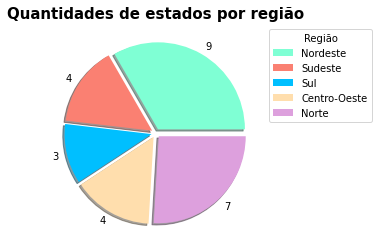

In [ ]:
#Quantidade de estados em cada região
cores = ['#7FFFD4', '#FA8072', '#00BFFF', '#FFDEAD', '#DDA0DD']

plt.pie(qhr['Unidadesfederativas'], labels=qhr['Unidadesfederativas'],shadow=True, explode=(0.05,0.05,0.05,0.05,0.05), colors=cores)
plt.legend(qhr['Região'], title='Região', bbox_to_anchor=(1, 1))
plt.title('Quantidades de estados por região', weight = 'bold', size=15)
plt.show()

Text(0, 0.5, 'Número de municípios')

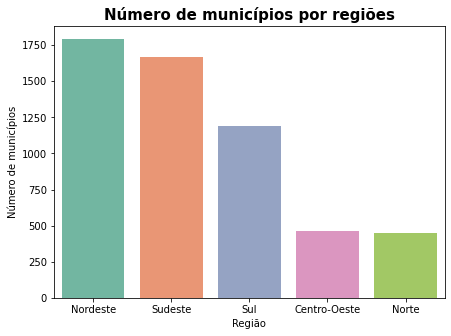

In [ ]:
#Número de municipios por região

plt.subplots(figsize=(7, 5))
sns.barplot(x=qhr['Região'], y=qhr['Municípios'], palette='Set2')

plt.title('Número de municípios por regiões', weight = 'bold', size=15)
plt.xlabel('Região')
plt.ylabel('Número de municípios')

Text(0.5, 0, 'Número de municípios')

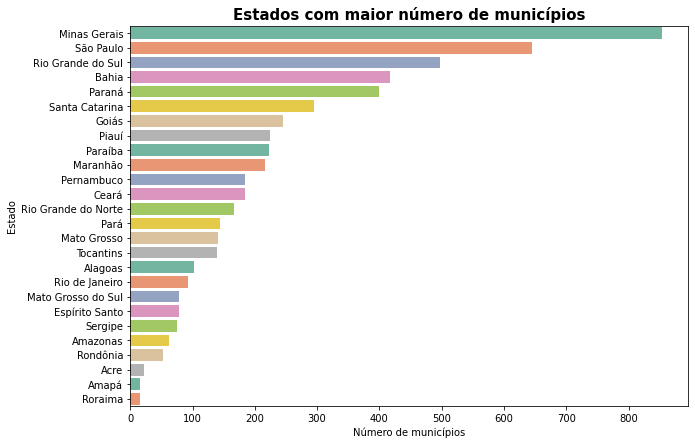

In [ ]:
#Número de municipios por estado

plt.subplots(figsize=(10, 7))
sns.barplot(x=qme['Número de municípios'], y=qme['Estado'], palette='Set2')

plt.title('Estados com maior número de municípios', weight = 'bold', size=15)
plt.ylabel('Estado')
plt.xlabel('Número de municípios')

In [ ]:
def regiao_plot(select_r):
    if (select_r == 'Sul'):
        regiao = qme.query('Região == "Sul"')
        regiao2 = qhr.query('Região == "Sul"')
    if (select_r == 'Sudeste'):
        regiao = qme.query('Região == "Sudeste"')
        regiao2 = qhr.query('Região == "Sudeste"')
    if (select_r == 'Norte'):
        regiao = qme.query('Região == "Norte"')
        regiao2 = qhr.query('Região == "Norte"')
    if (select_r == 'Nordeste'):
        regiao = qme.query('Região == "Nordeste"')
        regiao2 = qhr.query('Região == "Nordeste"')
    if (select_r == 'Centro-Oeste'):
        regiao = qme.query('Região == "Centro-Oeste"')
        regiao2 = qhr.query('Região == "Centro-Oeste"')
    
    #Numero de estados
    num_estados = regiao2['Unidadesfederativas'].values
    print('Numero de estados: ', num_estados)

    #Estados
    estados = regiao['Estado'].values
    print('Estados: ', estados)

    #Numero de municipios da regiao
    num_municipios = regiao2['Municípios'].values
    porcentagem = regiao2['Porcentagem'].values
    print('Numero de municipios da regiao: ', num_municipios)
    print('Porcentagem: ', porcentagem)
    
    #Numero de habitantes da regiao
    hab_regiao = regiao['Habitantes por estado'].sum()
    print('Hbitantes da região: ', hab_regiao)

    #Numero de municipios por estado
    sns.barplot(x=regiao['Número de municípios'], y=regiao['Estado'], palette='Set2')

    plt.title('Número de municípios por estado', weight = 'bold', size=15)
    plt.ylabel('Estado')
    plt.xlabel('Número de municípios')
    plt.show()

    #Numero de habitantes por estado
    sns.barplot(x=regiao['Habitantes por estado'], y=regiao['Estado'], palette='Set2')

    plt.title('Número de habitantes por estado', weight = 'bold', size=15)
    plt.ylabel('Estado')
    plt.xlabel('Habitantes por estado')
    plt.show()
    

Numero de estados:  [7]
Estados:  ['Pará' 'Tocantins' 'Amazonas' 'Rondônia' 'Acre' 'Amapá' 'Roraima']
Numero de municipios da regiao:  [450]
Porcentagem:  ['8,08%']
Hbitantes da região:  17687182


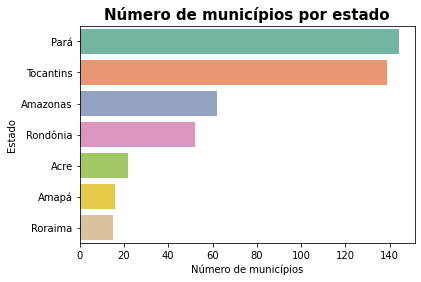

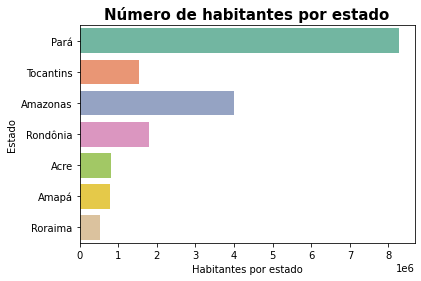

In [ ]:
regiao_plot('Norte')

Numero de estados:  [4]
Estados:  ['Minas Gerais' 'São Paulo' 'Rio de Janeiro' 'Espírito Santo']
Numero de municipios da regiao:  [1668]
Porcentagem:  ['29,95%']
Hbitantes da região:  86336484


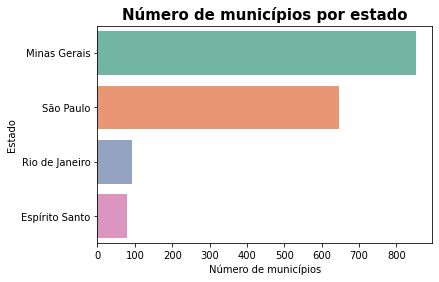

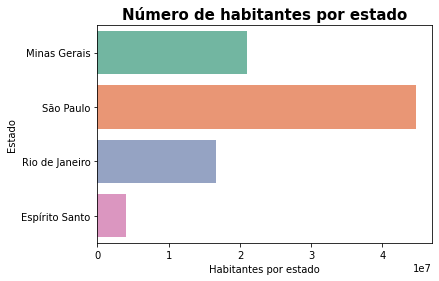

In [ ]:
regiao_plot('Sudeste')

Numero de estados:  [3]
Estados:  ['Rio Grande do Sul' 'Paraná' 'Santa Catarina']
Numero de municipios da regiao:  [1191]
Porcentagem:  ['21,39%']
Hbitantes da região:  29415231


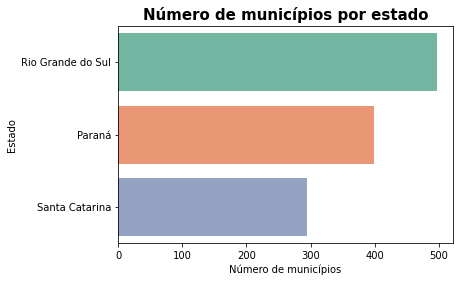

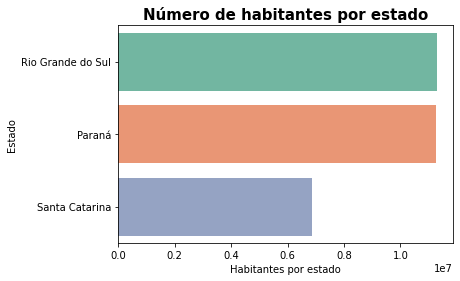

In [ ]:
regiao_plot('Sul')

Numero de estados:  [9]
Estados:  ['Bahia' 'Piauí' 'Paraíba' 'Maranhão' 'Pernambuco' 'Ceará'
 'Rio Grande do Norte' 'Alagoas' 'Sergipe']
Numero de municipios da regiao:  [1793]
Porcentagem:  ['32,21%']
Hbitantes da região:  56889586


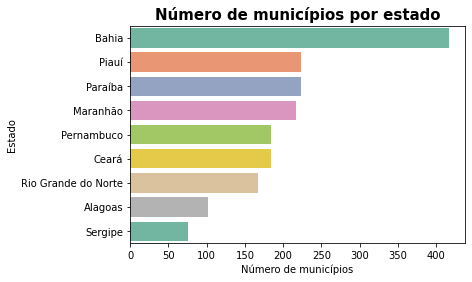

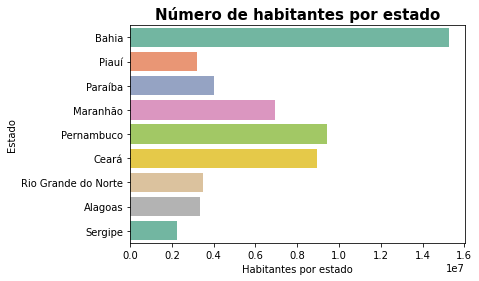

In [ ]:
regiao_plot('Nordeste')

Numero de estados:  [4]
Estados:  ['Goiás' 'Mato Grosso' 'Mato Grosso do Sul']
Numero de municipios da regiao:  [466]
Porcentagem:  ['8,37%']
Hbitantes da região:  12672973


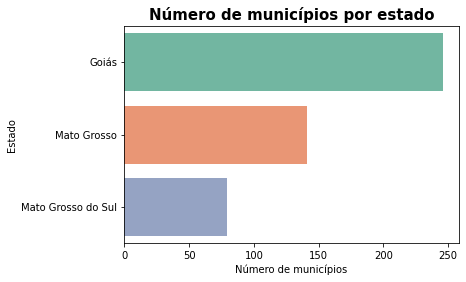

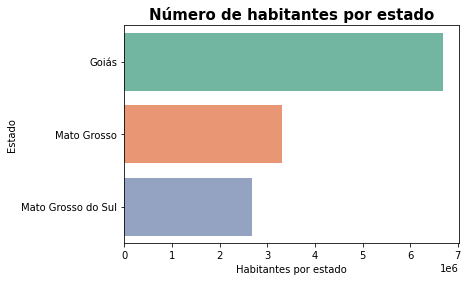

In [ ]:
regiao_plot('Centro-Oeste')